# Import libraries

In [23]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 
from matplotlib.pyplot import pie, axis, show

In [3]:
#Read the dataset
filepath = r"..\Data\BankChurners.csv"
data_df = pd.read_csv(filepath)
print(data_df)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

In [4]:
# Dropping the last two column

data_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)


# Data Exploration Analysis


In [5]:
data_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
print('Number of rows: ', data_df.shape[0])

Number of rows:  10127


In [7]:
print("\nNumber of features:", data_df.shape[1])


Number of features: 21


In [8]:
print("\nData Features:")
print(data_df.columns.tolist())


Data Features:
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [9]:
print("\nMissing values:", data_df.isnull().sum().values.sum())


Missing values: 0


In [10]:
print("\nUnique values:")
print(data_df.nunique())


Unique values:
CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64


In [11]:
# Categorical variable in pandas dataframe 
print("\nCategorical variable:", data_df.select_dtypes(exclude=[np.number]))



Categorical variable:           Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          B

In [12]:
print("\nNumeric_data:", data_df.select_dtypes(include=[np.number]))


Numeric_data:        CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      768805383            45                3              39   
1      818770008            49                5              44   
2      713982108            51                3              36   
3      769911858            40                4              34   
4      709106358            40                3              21   
...          ...           ...              ...             ...   
10122  772366833            50                2              40   
10123  710638233            41                2              25   
10124  716506083            44                1              36   
10125  717406983            30                2              36   
10126  714337233            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2  

## Summarization
There are 17 numerical features:

- CLIENTNUM : Unique identifier for the customer holding the account
- Customer_Age: Customer's Age in Years
- Dependent_count: Number of dependents
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total number of products held by the customer
- Months_Inactive_12_mon: Number of months inactive in the last 12 months
- Contacts_Count_12_mon: Number of Contacts in the last 12 months
- Credit_Limit:  Credit Limit on the Credit Card
- Total_Revolving_Bal: The unpaid portion that carries over to the next month when a customer does not pay
- Avg_Open_To_Buy: The average credit available allocated to a specific customer. (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Measures how much credit you are using compared to how much you have available.


There are 17 categorical features:

- Attrition_Flag: Whether the customer is "Existing Customer" or "Attrited Customer" 
- Gender: Whether the customer is a M or a F
- Education_Level: Whether the customer has 'High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate', 'Doctorate' qualification. 
- Marital_Status: Whether the customer is 'Married' 'Single' 'Unknown' 'Divorced'
- Income_Category: Whether the customer earn '$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +','Unknown'
- Card_Category: Whther the customer hold 'Blue' 'Gold' 'Silver' 'Platinum' card


## Target Variable Exploration 


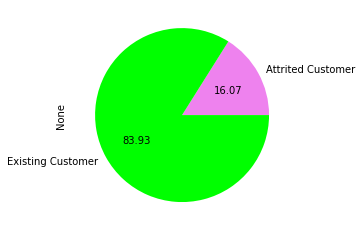

In [25]:
target_instance = data_df.groupby('Attrition_Flag').size().plot(kind='pie', autopct='%.2f',colors=['violet', 'lime'])